In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
sns.set(color_codes=True)

In [2]:
daily = pd.read_csv('final_daily_dataset.csv')
daily.head()

,LCLid,day,energy_sum,Acorn,day_of_week,weekend,Holiday,month,year,season
0,MAC000131,2011-12-15,9.505,ACORN-E,Thursday,0,0,12,2011,Winter
1,MAC000131,2011-12-16,14.216,ACORN-E,Friday,0,0,12,2011,Winter
2,MAC000131,2011-12-17,9.111,ACORN-E,Saturday,1,0,12,2011,Winter
3,MAC000131,2011-12-18,10.511,ACORN-E,Sunday,1,0,12,2011,Winter
4,MAC000131,2011-12-19,15.647,ACORN-E,Monday,0,0,12,2011,Winter


In [3]:
acorn = pd.read_csv('Acorn_cleaned_percentage.csv')
acorn.head()

,Acorn,electricity,recycle,water,adult,child,elderly,attitude,car_0,car_1,...,60k-80k,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv
0,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.055359,0.011593,0.039859,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
1,ACORN-B,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0.054181,0.013105,0.028722,...,0.111176,0.142117,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398
2,ACORN-C,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0.055359,0.012097,0.050996,...,0.078824,0.079402,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886
3,ACORN-D,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0.057126,0.104839,0.055686,...,0.100000,0.120253,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020
4,ACORN-E,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0.055948,0.059476,0.058617,...,0.089412,0.092060,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182


In [13]:
df = pd.DataFrame(daily.groupby('Acorn').energy_sum.mean())

In [15]:
df = pd.merge(acorn,df, on='Acorn')

In [17]:
df.head()

,Acorn,electricity,recycle,water,adult,child,elderly,attitude,car_0,car_1,...,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv,energy_sum
0,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0.055359,0.011593,0.039859,...,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048,19.063876
1,ACORN-B,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0.054181,0.013105,0.028722,...,0.142117,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398,11.902597
2,ACORN-C,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0.055359,0.012097,0.050996,...,0.079402,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886,11.950990
3,ACORN-D,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0.057126,0.104839,0.055686,...,0.120253,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020,13.578131
4,ACORN-E,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0.055948,0.059476,0.058617,...,0.092060,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182,10.353099


In [26]:
df_age = df[['Acorn', 'child', 'adult', 'elderly', 'energy_sum']]
df_age.head()

,Acorn,child,adult,elderly,energy_sum
0,ACORN-A,0.058293,0.048746,0.071493,19.063876
1,ACORN-B,0.057692,0.051596,0.067270,11.902597
2,ACORN-C,0.047776,0.048461,0.093213,11.950990
3,ACORN-D,0.050781,0.071266,0.031373,13.578131
4,ACORN-E,0.064303,0.064282,0.035596,10.353099


In [35]:
categories = {
 'age': ['child', 'adult', 'elderly'],
 'ethnicity': ['white', 'mixed', 'asian', 'black', 'other_ethnicity'],
 'house_size': ['bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5'],
 'child': ['child_0', 'child_1', 'child_2', 'child_3'],
 }

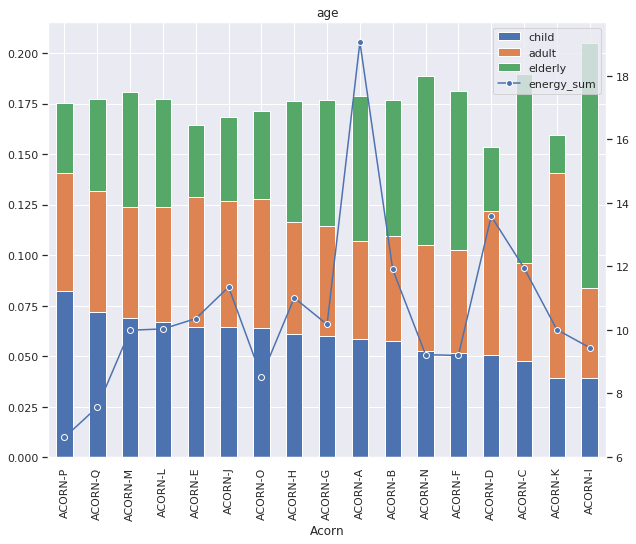

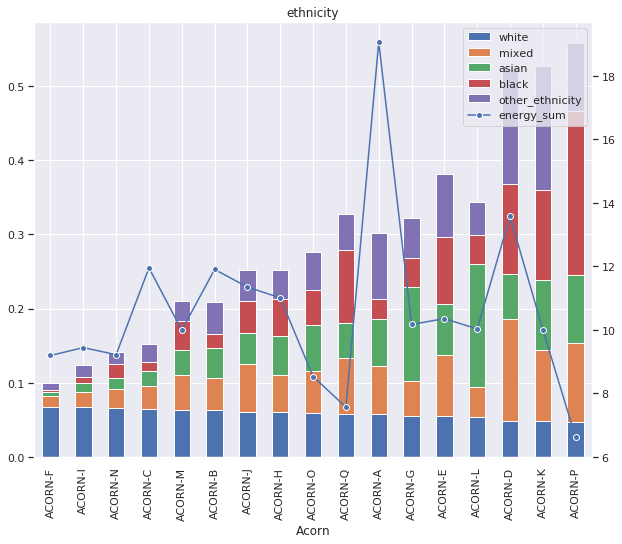

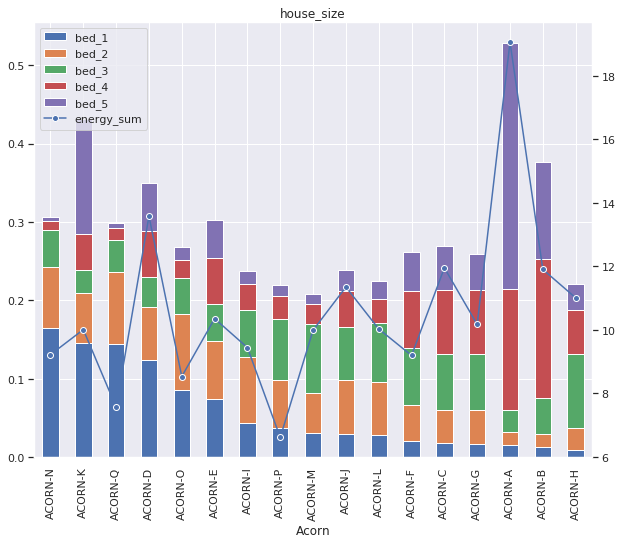

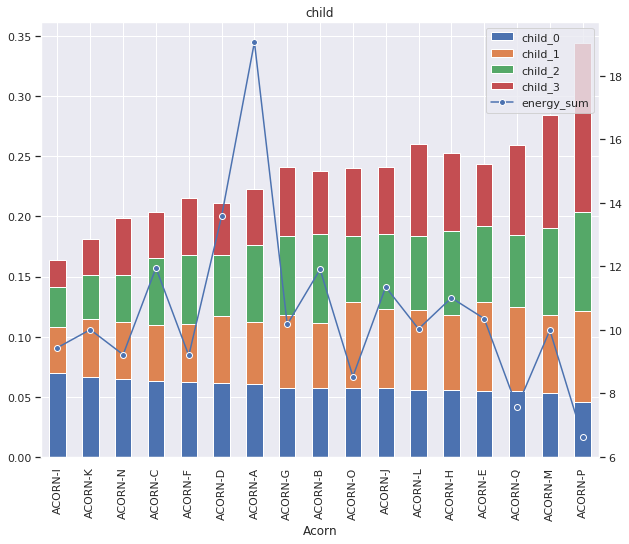

In [37]:
for key,value in categories.items():
    tmp = df[['Acorn','energy_sum']+value].groupby('Acorn').max().reset_index() \
            .sort_values(by=value, ascending=False)
    sns.set()
    fig,ax=plt.subplots(figsize=(10,8))
    ax2=ax.twinx()
    tmp[['Acorn','energy_sum']].set_index('Acorn').plot(kind='line',
                                                        linestyle='-', marker='o', markeredgecolor='white',
                                                        ax=ax2, grid=False)
    tmp[['Acorn']+value].set_index('Acorn').plot(kind='bar',stacked=True,ax=ax)
    ax.set_title(key)
    p1, labels1 = ax.get_legend_handles_labels()
    p2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(p1 + p2, labels1 + labels2, loc = 0)
    ax.get_legend().remove()

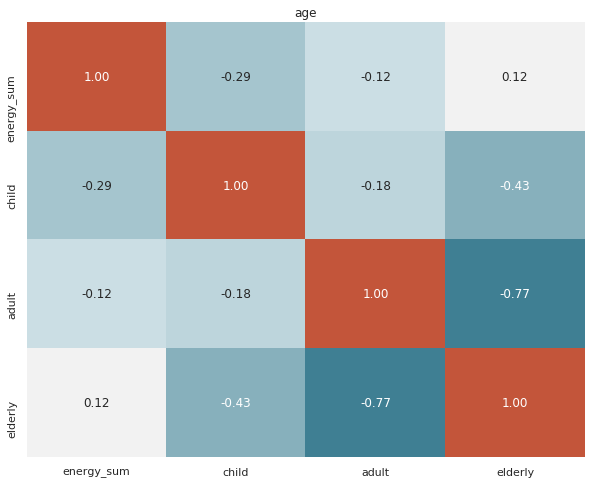

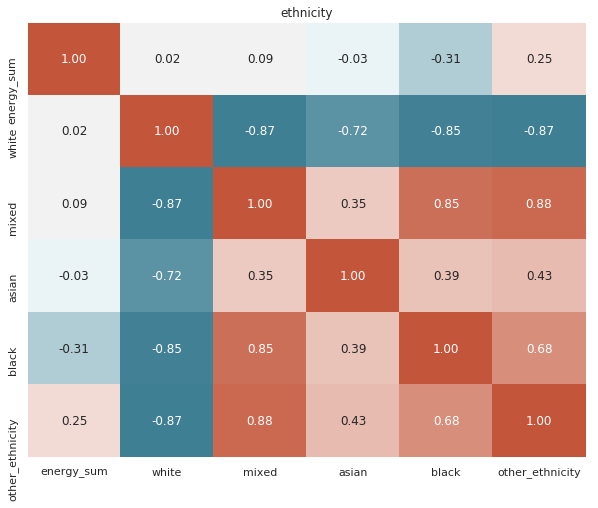

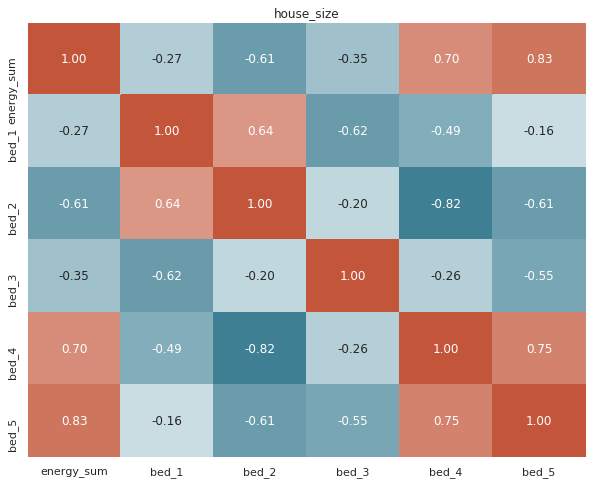

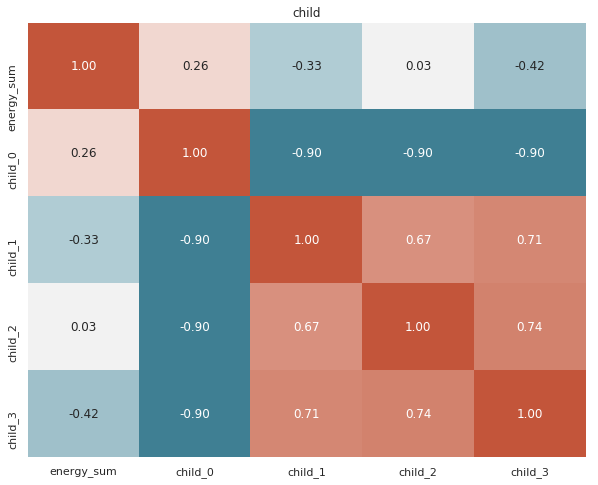

In [39]:
for key,value in categories.items():
    corr = df[['energy_sum'] + value].corr() 
    fig,ax=plt.subplots(figsize=(10,8))
    cm = sns.light_palette("green", as_cmap=True) 
    cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(corr, annot=True, fmt='.2f',cmap=cm, cbar=False, ax=ax);
    ax.set_title(key)